In [1]:
from indextracking import create_portfolio
from data import build_dataset
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Define index and stock tickers
bvsp_index_ticker = '^BVSP'
bvsp_stock_tickers = [
  "ALOS3.SA", "ALPA4.SA", "ABEV3.SA", "ASAI3.SA", "AURE3.SA", "AZUL4.SA", "AZZA3.SA",
  "B3SA3.SA", "BBSE3.SA", "BBDC3.SA", "BBDC4.SA", "BRAP4.SA", "BBAS3.SA", "BRKM5.SA",
  "BRAV3.SA", "BRFS3.SA", "BPAC11.SA", "CXSE3.SA", "CRFB3.SA", "CCRO3.SA", "CMIG4.SA",
  "COGN3.SA", "CPLE6.SA", "CSAN3.SA", "CPFE3.SA", "CMIN3.SA", "CVCB3.SA", "CYRE3.SA",
  "ELET3.SA", "ELET6.SA", "EMBR3.SA", "ENGI11.SA", "ENEV3.SA", "EGIE3.SA", "EQTL3.SA",
  "EZTC3.SA", "FLRY3.SA", "GGBR4.SA", "GOAU4.SA", "NTCO3.SA", "HAPV3.SA", "HYPE3.SA",
  "IGTI11.SA", "IRBR3.SA", "ITSA4.SA", "ITUB4.SA", "JBSS3.SA", "KLBN11.SA", "RENT3.SA",
  "LREN3.SA", "LWSA3.SA", "MGLU3.SA", "MRFG3.SA", "BEEF3.SA", "MRVE3.SA", "MULT3.SA",
  "PCAR3.SA", "PETR3.SA", "PETR4.SA", "RECV3.SA", "PRIO3.SA", "PETZ3.SA", "RADL3.SA",
  "RAIZ4.SA", "RDOR3.SA", "RAIL3.SA", "SBSP3.SA", "SANB11.SA", "STBP3.SA", "SMTO3.SA",
  "CSNA3.SA", "SLCE3.SA", "SUZB3.SA", "TAEE11.SA", "VIVT3.SA", "TIMS3.SA", "TOTS3.SA",
  "TRPL4.SA", "UGPA3.SA", "USIM5.SA", "VALE3.SA", "VAMO3.SA", "VBBR3.SA", "VIVA3.SA",
  "WEGE3.SA", "YDUQ3.SA"
]

sp100_index_ticker = '^OEX'
sp100_stock_tickers = [
    'AAPL', 'ABBV', 'ABT', 'ACN', 'ADBE', 'AIG', 'AMD', 'AMGN', 'AMT', 'AMZN',
    'AVGO', 'AXP', 'BA', 'BAC', 'BK', 'BKNG', 'BLK', 'BMY', 'C', 'CAT',
    'CHTR', 'CL', 'CMCSA', 'COF', 'COP', 'COST', 'CRM', 'CSCO', 'CVS', 'CVX',
    'DHR', 'DIS', 'DOW', 'DUK', 'EMR', 'EXC', 'F', 'FDX', 'GD', 'GE',
    'GILD', 'GM', 'GOOG', 'GOOGL', 'GS', 'HD', 'HON', 'IBM', 'INTC', 'JNJ',
    'JPM', 'KHC', 'KO', 'LLY', 'LMT', 'LOW', 'MA', 'MCD', 'MDLZ', 'MDT',
    'MET', 'META', 'MMM', 'MO', 'MRK', 'MS', 'MSFT', 'NEE', 'NFLX', 'NKE',
    'NVDA', 'ORCL', 'PEP', 'PFE', 'PG', 'PM', 'PYPL', 'QCOM', 'RTX', 'SBUX',
    'SCHW', 'SO', 'SPG', 'T', 'TGT', 'TMO', 'TMUS', 'TSLA', 'TXN', 'UNH',
    'UNP', 'UPS', 'USB', 'V', 'VZ', 'WBA', 'WFC', 'WMT'
]

In [3]:
start_date_dataset = dt.datetime(2023, 1, 1, tzinfo=dt.timezone.utc)
end_date_dataset = dt.datetime(2024, 1, 1, tzinfo=dt.timezone.utc)
start_date_train = start_date_dataset
end_date_train = dt.datetime(2023, 6, 1, tzinfo=dt.timezone.utc)
start_date_test = end_date_train
end_date_test = end_date_dataset

In [4]:
# Build dataset from choosen tickers
sp100_values, sp100_data = build_dataset(sp100_index_ticker, sp100_stock_tickers, start_date_dataset, end_date_dataset)
bvsp_values, bvsp_data = build_dataset(bvsp_index_ticker, bvsp_stock_tickers,start_date_dataset, end_date_dataset)

sp100_index_data = sp100_data[sp100_index_ticker]
sp100_stocks_data = sp100_data.drop(columns=[sp100_index_ticker])

bvsp_index_data = bvsp_data[bvsp_index_ticker]
bvsp_stocks_data = bvsp_data.drop(columns=[bvsp_index_ticker])

sp100_index_values = sp100_values[sp100_index_ticker]
sp100_stocks_values = sp100_values.drop(columns=[sp100_index_ticker])

bvsp_index_values = bvsp_values[bvsp_index_ticker]
bvsp_stocks_values = bvsp_values.drop(columns=[bvsp_index_ticker])

[*********************100%***********************]  99 of 99 completed


Data downloaded successfully.
Removed stocks: set()
Data cleaned successfully.
Data saved to returns_^OEX_and_2023-01-01 00:00:00+00:00_2024-01-01 00:00:00+00:00_years.csv


[*********************100%***********************]  87 of 87 completed

1 Failed download:
['BRAV3.SA']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2023-01-01 00:00:00+00:00 -> 2024-01-01 00:00:00+00:00) (Yahoo error = "Data doesn\'t exist for startDate = 1672531200, endDate = 1704067200")')


Data downloaded successfully.
Removed stocks: {'BRAV3.SA', 'ALOS3.SA'}
Data cleaned successfully.
Data saved to returns_^BVSP_and_2023-01-01 00:00:00+00:00_2024-01-01 00:00:00+00:00_years.csv


In [5]:
def train_test_split(x, y, start_date_train, end_date_train, start_date_test, end_date_test):
    x_train = x.loc[start_date_train:end_date_train]
    x_test = x.loc[start_date_test:end_date_test]
    y_train = y.loc[start_date_train:end_date_train]
    y_test = y.loc[start_date_test:end_date_test]
    return x_train, x_test, y_train, y_test

In [6]:
x_sp100_train, x_sp100_test, y_sp100_train, y_sp100_test = train_test_split(sp100_stocks_data, sp100_index_data, start_date_train, end_date_train, start_date_test, end_date_test)
x_bvsp_train, x_bvsp_test, y_bvsp_train, y_bvsp_test = train_test_split(bvsp_stocks_data, bvsp_index_data, start_date_train, end_date_train, start_date_test, end_date_test)

In [7]:
portfolio_sp100 = create_portfolio(x_sp100_train, y_sp100_test, portfolio_size=25, max_iterations=1000000)

Restricted license - for non-production use only - expires 2026-11-23
Set parameter IterationLimit to value 1000000
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (linux64 - "Ubuntu 22.04.4 LTS")

CPU model: Intel(R) Core(TM) i5-7400 CPU @ 3.00GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 4 logical processors, using up to 4 threads

Non-default parameters:
IterationLimit  1000000

Optimize a model with 100 rows, 196 columns and 392 nonzeros
Model fingerprint: 0xe7801cd0
Model has 4851 quadratic objective terms
Variable types: 98 continuous, 98 integer (98 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [4e-08, 1e-04]
  QObjective range [9e-08, 4e-03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+01]
Found heuristic solution: objective 0.0002094
Presolve time: 0.00s
Presolved: 100 rows, 196 columns, 392 nonzeros
Presolved model has 4851 quadratic objective terms
Variable types: 98 continuous, 98 integer (98 

In [8]:
portfolio_bvsp = create_portfolio(x_bvsp_train, y_bvsp_test, portfolio_size=25, max_iterations=1000000)

Set parameter IterationLimit to value 1000000
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (linux64 - "Ubuntu 22.04.4 LTS")

CPU model: Intel(R) Core(TM) i5-7400 CPU @ 3.00GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 4 logical processors, using up to 4 threads

Non-default parameters:
IterationLimit  1000000

Optimize a model with 86 rows, 168 columns and 336 nonzeros
Model fingerprint: 0x498c6659
Model has 3570 quadratic objective terms
Variable types: 84 continuous, 84 integer (84 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [3e-07, 2e-04]
  QObjective range [4e-07, 1e-02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+01]
Found heuristic solution: objective 0.0005500
Presolve time: 0.00s
Presolved: 86 rows, 168 columns, 336 nonzeros
Presolved model has 3570 quadratic objective terms
Variable types: 84 continuous, 84 integer (84 binary)

Root relaxation: objective 1.245485e-04, 202 iterations, 0.00 s

In [9]:
print(f'portfolio bvsp: \n{portfolio_bvsp}')
print(f'\nportfolio bvsp length: {len(portfolio_bvsp)}')

portfolio bvsp: 
{'ABEV3.SA': 0.026813807576039392, 'AURE3.SA': 0.0904830808190438, 'BBSE3.SA': 0.05870260976450488, 'BEEF3.SA': 0.0020571728429541834, 'BRAP4.SA': 0.026344251963282928, 'CXSE3.SA': 0.1394051726779713, 'EMBR3.SA': 0.12729188635022493, 'GGBR4.SA': 0.005747481850071699, 'KLBN11.SA': 0.05906364612007356, 'PCAR3.SA': 0.07447066002873595, 'SLCE3.SA': 0.11475493889281634, 'SMTO3.SA': 0.0, 'STBP3.SA': 0.02737595847148083, 'SUZB3.SA': 0.13540077152630925, 'TAEE11.SA': 0.08225476180643511, 'TIMS3.SA': 0.0, 'TOTS3.SA': 0.0, 'TRPL4.SA': 0.0, 'UGPA3.SA': 0.029833799310055985, 'USIM5.SA': 0.0, 'VALE3.SA': 0.0, 'VAMO3.SA': 0.0, 'VBBR3.SA': 0.0, 'VIVA3.SA': 0.0, 'WEGE3.SA': 0.0}

portfolio bvsp length: 25


In [10]:
print(f'portfolio sp100: \n{portfolio_sp100}')
print(f'\nportfolio sp100 length: {len(portfolio_sp100)}')

portfolio sp100: 
{'ABBV': 0.1230416761906363, 'ABT': 0.04143598111544891, 'AMGN': 0.0343785526490758, 'BKNG': 0.035155310461519824, 'BMY': 0.07116207106277933, 'CL': 0.09827228093200026, 'FDX': 0.11486480532038516, 'GE': 0.0047163909968089565, 'GOOG': 0.004096424819052412, 'IBM': 0.07566979253876806, 'LLY': 0.013140043609240377, 'LMT': 0.10593345429822029, 'LOW': 0.01929727467975877, 'PEP': 0.07641280495822599, 'PM': 0.060733462570810456, 'T': 0.053898419912241445, 'TGT': 0.0, 'TMO': 0.03322128254445842, 'TMUS': 0.034569971340569244, 'TSLA': 0.0, 'TXN': 0.0, 'UNH': 0.0, 'UNP': 0.0, 'UPS': 0.0, 'VZ': 0.0}

portfolio sp100 length: 25


In [11]:
print(x_bvsp_train)
print(y_bvsp_train)

Ticker                     ABEV3.SA  ALPA4.SA  ASAI3.SA  AURE3.SA  AZUL4.SA  \
Date                                                                          
2023-01-03 00:00:00+00:00 -0.001409 -0.064899 -0.020011 -0.017956 -0.013592   
2023-01-04 00:00:00+00:00  0.005646  0.006716  0.025255  0.019691  0.039370   
2023-01-05 00:00:00+00:00  0.002807  0.027428 -0.005241  0.004828  0.093750   
2023-01-06 00:00:00+00:00  0.002099  0.000722  0.003161  0.000686  0.025108   
2023-01-09 00:00:00+00:00  0.005587  0.025234  0.009979 -0.016461  0.013514   
...                             ...       ...       ...       ...       ...   
2023-05-26 00:00:00+00:00  0.001357 -0.000961 -0.019776 -0.004930  0.027564   
2023-05-29 00:00:00+00:00  0.000000  0.001925  0.010526  0.004246  0.016843   
2023-05-30 00:00:00+00:00 -0.018970  0.004803 -0.026042 -0.001409 -0.015337   
2023-05-31 00:00:00+00:00 -0.004834 -0.001912 -0.041890 -0.006351  0.049844   
2023-06-01 00:00:00+00:00 -0.011797  0.020115  0.024

In [12]:
def plot_portfolio(portfolio, stocks_data, index_data, start_date, end_date):
    portfolio_data = stocks_data[list(portfolio.keys())]
    
    portfolio_data_filtered = (portfolio_data * portfolio.values()).sum(axis=1).loc[start_date:end_date]
    portfolio_data_normalized = portfolio_data_filtered / portfolio_data_filtered.max()
    
    
    index_data_filtered = index_data.loc[start_date:end_date]
    index_data_normalized = index_data_filtered / index_data_filtered.max()
    
    fig = plt.figure(figsize=(15, 8))
    eixo = fig.add_axes([0, 0, 1, 1])
    
    eixo.plot(index_data_filtered.index, index_data_normalized, color='red', linestyle='-', linewidth=3, label="S&P 100")
    
    eixo.plot(portfolio_data_filtered.index, portfolio_data_normalized, color='b', linewidth=1, label="Portfolio")
    
    eixo.set_title(f"Portfolio {start_date} to {end_date}", fontsize=25, pad=20)
    eixo.legend(title="Indicador", loc='upper left', fontsize=15)
    eixo.set_ylabel('Valor Normalizado (0 a 1)', fontsize=20)
    eixo.set_xlabel('Data', fontsize=20)
    eixo.grid(True)

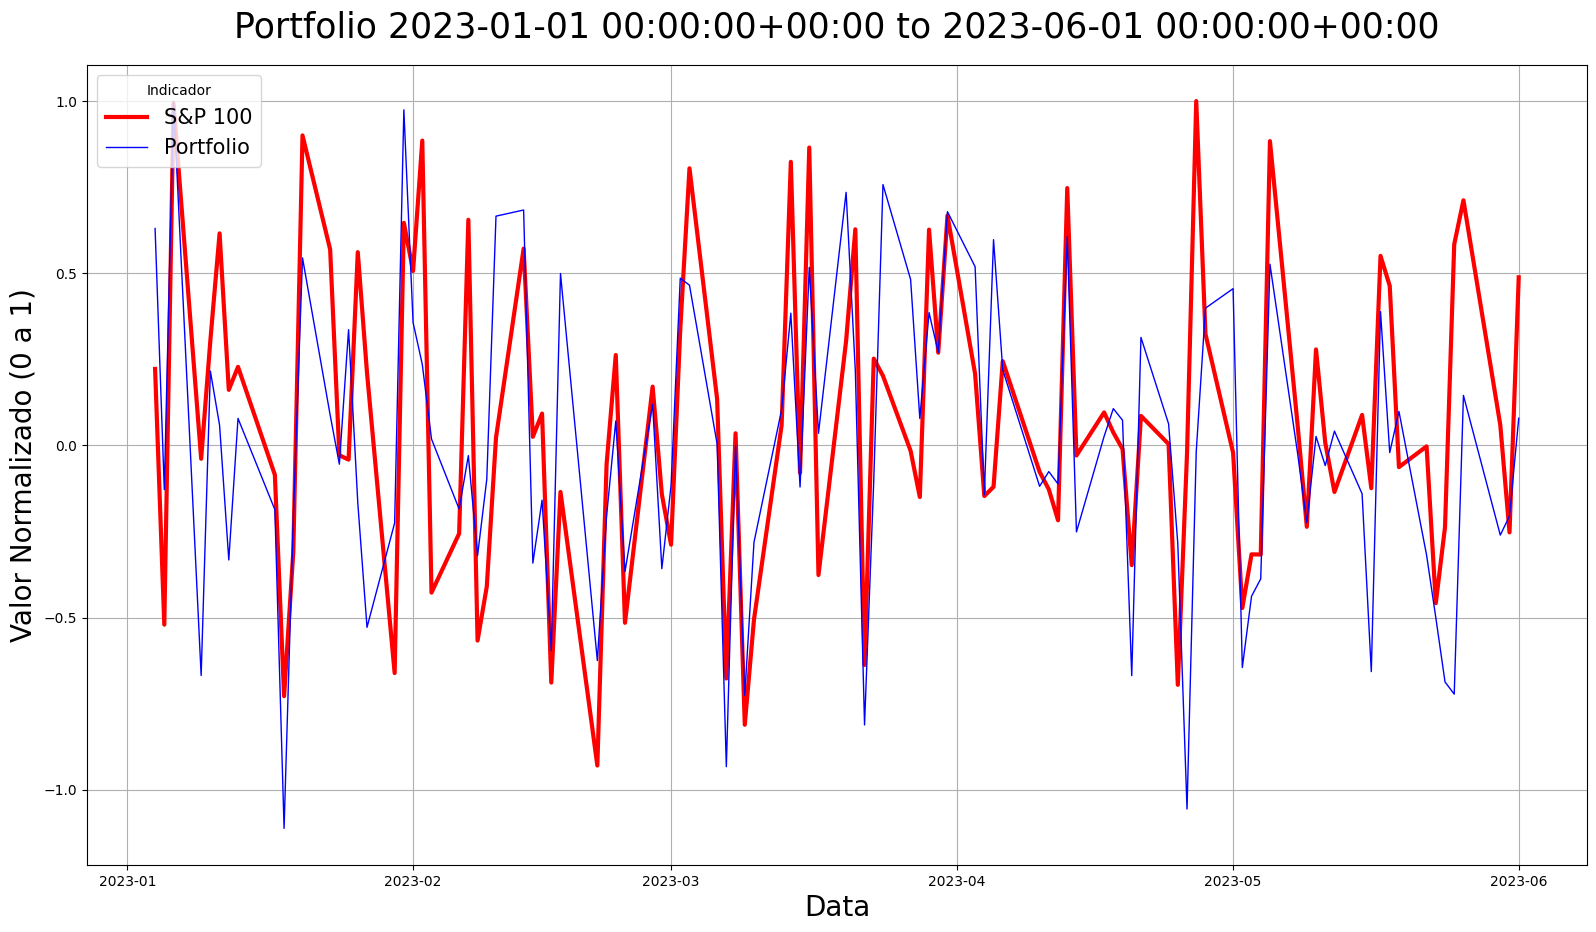

In [13]:
plot_portfolio(portfolio_sp100, sp100_stocks_data, sp100_index_data, start_date_train, end_date_train)

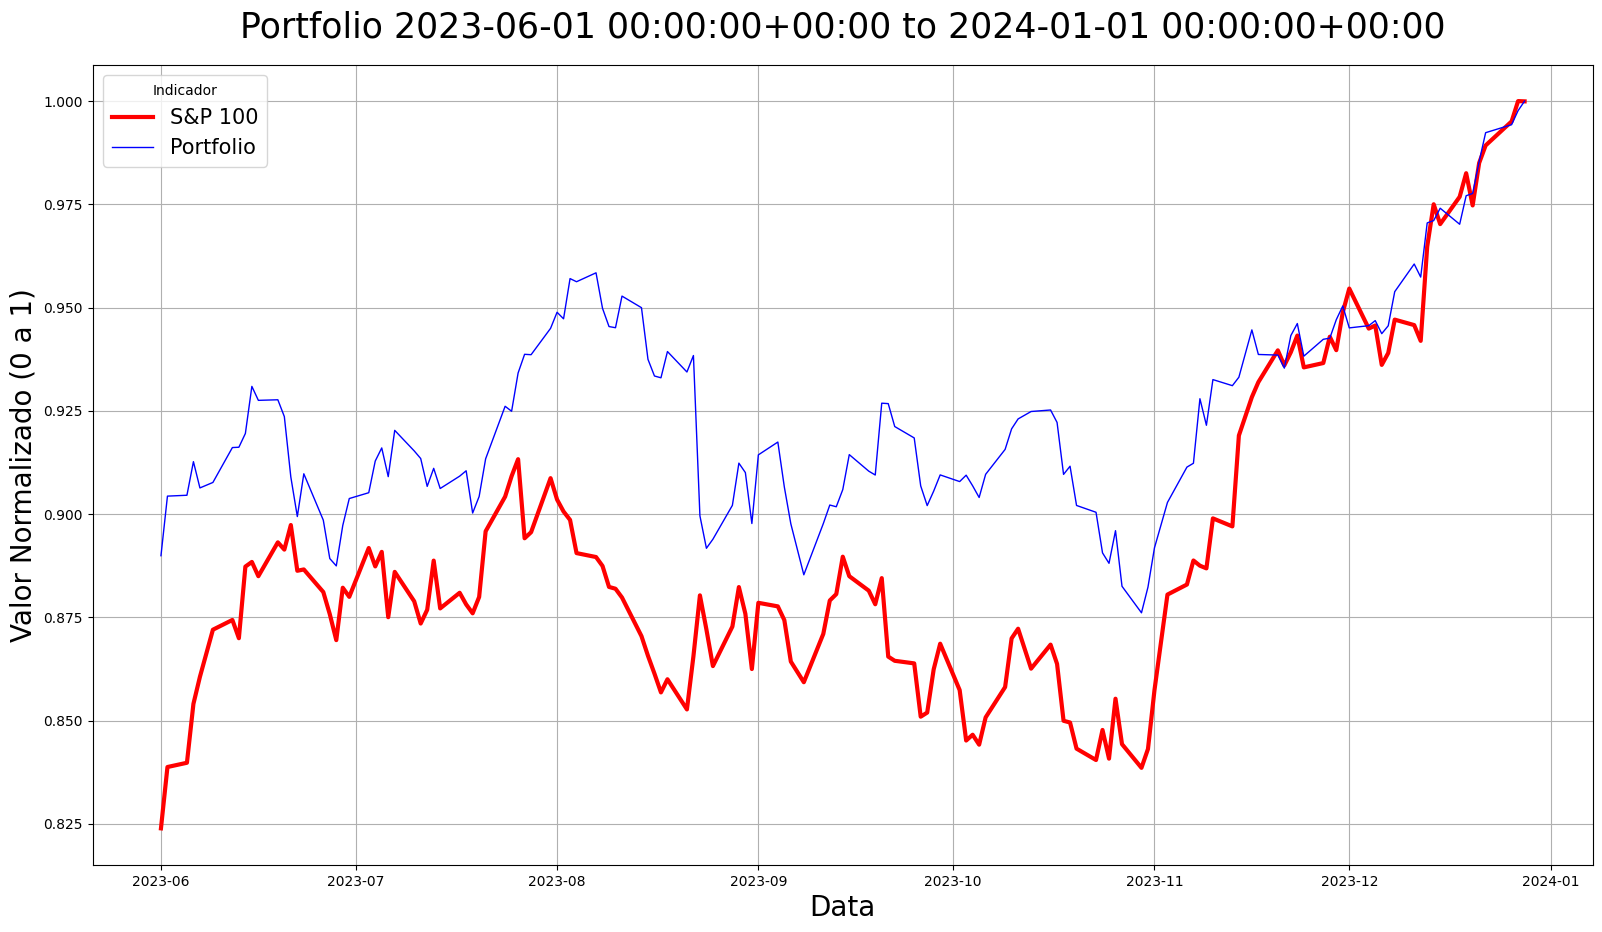

In [14]:
plot_portfolio(portfolio_bvsp, bvsp_stocks_values, bvsp_index_values, start_date_test, end_date_test)